In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/egp4aq/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


*Your answer here.*

## 3. Import libraries

In [1]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [2]:
# Read in spills data
fp = os.path.join('data','Spill_Incidents_20241104.csv')
spills = gpd.read_file(fp)
spills.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [3]:
# Read in counties data
fp2 = os.path.join('data','tl_2023_us_county','tl_2023_us_county.shp')
counties = gpd.read_file(fp2)
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [4]:
# a. Check spills dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [5]:
# b. Check spills dataframe's column data types
spills.dtypes

Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object

In [6]:
# c. Check unique values in material_family column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
# d. Check unique values in county column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

Most importantly, preliminary exploration showed us that the column names are not in lower snake case. It also showed us that there is not a completely normal distribution of county, while some have regions distinguished and some do not. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [8]:
# a. Clean column names --> convert to lowercase, replace spaces with underscores
spills.columns = (spills.columns.str.lower().str.replace(' ','_'))

# Print out columns to check cleaning 
print(spills.columns)

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered', 'geometry'],
      dtype='object')


In [9]:
# b. Change date columns to be of type datetime
columns = ['spill_date','received_date','close_date']
for column in columns:
    spills[column] = pd.to_datetime(spills[column])

print(spills.dtypes)

spill_number                     object
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                        object
dec_region                       object
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
geometry                       geometry
dtype: object


### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# Look at spill_date column to see how to format date in conditional
# print(spills['spill_date'].unique)

# Create range for spills to avoid data type troubles
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-10-31')

In [11]:
# a. Select spill data between 1/1/23 and 10/31/23
petr_23 = spills[(spills['material_family']=="Petroleum") 
                 & (spills['spill_date'] >= start_date) 
                 & (spills['spill_date'] <= end_date)]
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,diesel,Petroleum,0,,0,None
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,#2 fuel oil,Petroleum,0,Gallons,0,None
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,gasoline,Petroleum,0,,0,None
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0,,0,None
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0,,0,None


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [12]:
# b. Verify that petr_23 only has data within the correct time frame
date_valid = (petr_23['spill_date'].dt.year==2023) & (petr_23['spill_date'].dt.month<=10)

petr_23[~date_valid]

print(f"There are {petr_23[~date_valid].size} observations outside of the range from January to October in 2023.")

There are 0 observations outside of the range from January to October in 2023.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# c. Test that petr_23 only has data for petroleum spills
# Use .all() function to deal with the Series
assert(petr_23['material_family'] == "Petroleum").all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [14]:
# Group by county and count spills
spills_per_county = petr_23.groupby('county').size().reset_index(name = 'n_spills')
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# a. Check counties head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# b. Check counties data types
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [17]:
# c. Check counties CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

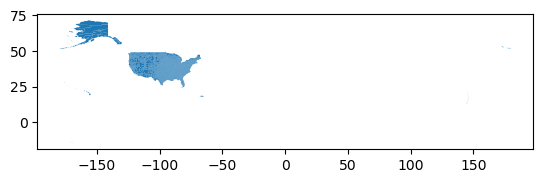

In [18]:
# d. Plot gdf
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

From the preliminary data exploration, we found that the column names are not extremely intuitive, and don't give us a ton of information. We see from the plot that some wranging to get only counties in the contiguous United States might be helpful. 

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [19]:
# Clean column names --> making them all lowercase (there are no spaces in the names)
counties.columns = counties.columns.str.lower()

# Check that changes were successful
print(counties.columns)

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

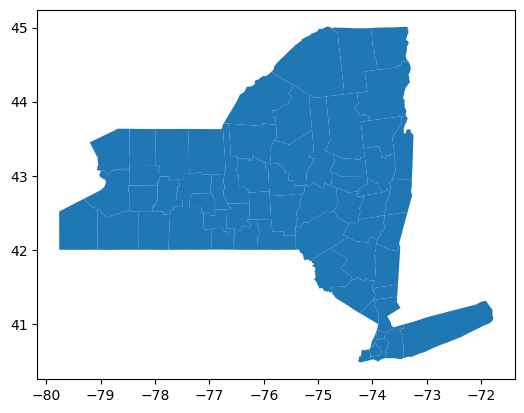

In [20]:
# Select only NY counties - NY state FIPS code is 36
ny_counties = counties[counties['statefp']=='36']

# Plot ny_counties
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [21]:
# a. Print out unique county names in ny_counties
unique_ny_counties = ny_counties['name'].unique()
print(unique_ny_counties)

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [22]:
# b. Print out unique county names in spills_per_county
unique_spill_counties = spills_per_county['county'].unique()
print(unique_spill_counties)

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [23]:
# Find counties in spills_per_county but not ny_counties by using setdiff1d()
diff_names_spills = np.setdiff1d(unique_spill_counties, unique_ny_counties)
diff_names_spills

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [24]:
# Find counties in ny_counties but not spills_per_county by using setdiff1d()
diff_names_ny = np.setdiff1d(unique_ny_counties, unique_spill_counties)
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [25]:
# Find number of spills in 'Tuscarora Indian Reservation'
num_spills_TIR = spills_per_county[spills_per_county['county'] == "Tuscarora Indian Reservation"]
num_spills_TIR

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [26]:
# Update St. Lawrence name in spills_per_county
# Find location of St. Lawrence in spills_per_county
# print(spills_per_county[spills_per_county['county']=='St Lawrence'])

# Update name at row 50
spills_per_county.loc[50, 'county'] = "St. Lawrence"

assert spills_per_county.loc[50, 'county'] == "St. Lawrence"

In [27]:
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [28]:
# a. Change name column in ny_counties to match spills_per_county
ny_counties = ny_counties.rename(columns={'name':'county'})
# Print column names to confirm change
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'county',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [29]:
# b. Inner join spills_per_county and ny_counties and save as ny_counties
ny_counties = pd.merge(ny_counties, spills_per_county, on='county', how='inner')
# Check output of inner join
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",161



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [32]:
# c. Add a spill to Niagara county to count for Tuscarora Indian Reservation
# First, find how many spills there are in Niagara county & location of Niagara county in df
print((ny_counties[ny_counties['county']=='Niagara']).n_spills)

# Update n_spills
ny_counties.at[45, 'n_spills'] = 89

# Confirm update
ny_counties['n_spills'].iloc[45]

45    89
Name: n_spills, dtype: int64


89

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



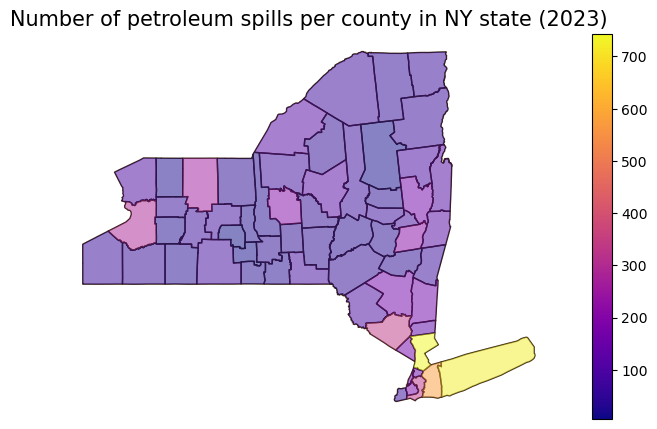

In [39]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(9, 5))

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Number of petroleum spills per county in NY state (2023)', 
              fontsize=15)

# Add states
ny_counties.plot(ax=ax,
               color='none',
               edgecolor='#362312')

ny_counties.plot(ax=ax,
                column="n_spills",
                legend=True,
                markersize=4,
                cmap='plasma',
                alpha=0.5)
                  
plt.annotate('Data source: New York State Department of Environmental Conservation',
            xy = (2, 4), fontsize=10)
plt.annotate('Date accessed: 11/04/2024',
            xy = (3, 5), fontsize=8)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*